In [1]:
#example of retrieving all files
import utils
f = utils.get_files("v05_standardvars")
print(f)

Welcome to JupyROOT 6.14/04
{'Data': ['/project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/data15_13TeV.periodAllYear.physics_Main.PhysCont.DAOD_MUON1.grp15_v01_p4144_muonptcalib_v05_EXT0_1.root', '/project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/data15_13TeV.periodAllYear.physics_Main.PhysCont.DAOD_MUON1.grp15_v01_p4144_muonptcalib_v05_EXT0_2.root', '/project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/data15_13TeV.periodAllYear.physics_Main.PhysCont.DAOD_MUON1.grp15_v01_p4144_muonptcalib_v05_EXT0_0.root', '/project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/data16_13TeV.periodAllYear.physics_Main.PhysCont.DAOD_MUON1.grp16_v01_p4144_muonptcalib_v05_EXT0_1.root', '/project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/data16_13TeV.periodAllYear.physics_Main.PhysCont.DAOD_MUON1.grp16_v01_p4144_muonptcalib_v05_EXT0_0.root', '/project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/data16_13TeV.periodAllYe

In [2]:
#lets use mc16a
mc16a_pp8_zmumu_files = f["MC1516"]
mc16a_pp8_zmumu_files

['/project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/mc16_13TeV.361107.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zmumu.r9364_muonptcalib_v05mcfix_EXT0_10.root',
 '/project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/mc16_13TeV.361107.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zmumu.r9364_muonptcalib_v05mcfix_EXT0_13.root',
 '/project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/mc16_13TeV.361107.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zmumu.r9364_muonptcalib_v05mcfix_EXT0_1.root',
 '/project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/mc16_13TeV.361107.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zmumu.r9364_muonptcalib_v05mcfix_EXT0_3.root',
 '/project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/mc16_13TeV.361107.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zmumu.r9364_muonptcalib_v05mcfix_EXT0_0.root',
 '/project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/mc16_13TeV.361107.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zmumu.r9364_muonptcalib_v05mcfix_EXT0_4.roo

In [3]:
#lets get a dataframe
location = "ID"
df = utils.get_dataframe(mc16a_pp8_zmumu_files[0],\
                         0,\
                         1000000,\
                         ["{}_{}_{}".format(x,y,z) for x in ["Pos", "Neg"] for y in [location] for z in ["Eta", "Pt", "Phi"]] + ["TotalWeight"] + ["Pair_{}_Mass".format(location)],\
                         "")
df
injected_df = utils.get_dataframe(mc16a_pp8_zmumu_files[0],\
                         0,\
                         1000000,\
                         ["{}_{}_{}".format(x,y,z) for x in ["Pos", "Neg"] for y in [location] for z in ["Eta", "Pt", "Phi"]] + ["TotalWeight"] + ["Pair_{}_Mass".format(location)],\
                         "")

Reading /project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/mc16_13TeV.361107.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zmumu.r9364_muonptcalib_v05mcfix_EXT0_10.root
reading 1000000 events
Skimming overweight events
Skimmed 0 events
Skipped weights []

['Pos_ID_Eta', 'Pos_ID_Pt', 'Pos_ID_Phi', 'Neg_ID_Eta', 'Neg_ID_Pt', 'Neg_ID_Phi', 'TotalWeight', 'Pair_ID_Mass']
Events passing selection 1000000
Reading /project/def-psavard/ladamek/ForLukas/muonptcalib_v05_standardvars/mc16_13TeV.361107.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zmumu.r9364_muonptcalib_v05mcfix_EXT0_10.root
reading 1000000 events
Skimming overweight events
Skimmed 0 events
Skipped weights []

['Pos_ID_Eta', 'Pos_ID_Pt', 'Pos_ID_Phi', 'Neg_ID_Eta', 'Neg_ID_Pt', 'Neg_ID_Phi', 'TotalWeight', 'Pair_ID_Mass']
Events passing selection 1000000


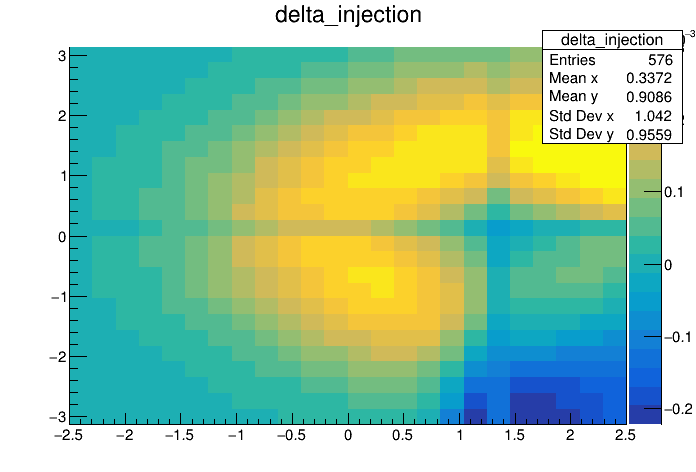

In [4]:
#lets get an injection histogram:
from BiasInjection import injection_histogram_local
#from atlasplots import set_atlas_style 

import ROOT
histogram = injection_histogram_local(detector_location=location)
c=ROOT.TCanvas()
histogram.Draw("COLZ")
c.Draw()
injection_histogram = histogram.Clone()
injection_histogram.Scale(-1.0) #invert it's sign for injection

In [5]:
#lets inject the bias into the histogram
from BiasCorrection import SagittaBiasCorrection
from variables import calc_pos_id_eta, calc_neg_id_eta, calc_pos_id_phi, calc_neg_id_phi
injector = SagittaBiasCorrection([injection_histogram], calc_pos_id_eta, calc_neg_id_eta, calc_pos_id_phi, calc_neg_id_phi, flavour=location)
injected_df = injector.calibrate(injected_df)

CALIBRATING VARIABLES
The amount of overflow, positive:
-2.5 2.5
18678
The amount of overflow, negative:
-3.1415927 3.1415927
19314


/project/def-psavard/ladamek/pymomentumvaldiation/SagittaBiasCorrection/BiasCorrection.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[pos_pt_name][pos_selection] = data[pos_pt_name][pos_selection] / (1.0 + ((1.0) * data[pos_pt_name][pos_selection] * correction_for_data_pos[pos_selection]))
/project/def-psavard/ladamek/pymomentumvaldiation/SagittaBiasCorrection/BiasCorrection.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[neg_pt_name][neg_selection] = data[neg_pt_name][neg_selection] / (1.0 + ((-1.0) * data[neg_pt_name][neg_selection] * correction_for_data_neg[neg_selection]))


CALIBRATED PTS
Correcting variables
0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
          ... 
999970    True
999971    True
999972    True
999973    True
999974    True
999975    True
999976    True
999977    True
999978    True
999979    True
999980    True
999981    True
999982    True
999983    True
999984    True
999985    True
999986    True
999987    True
999988    True
999989    True
999990    True
999991    True
999992    True
999993    True
999994    True
999995    True
999996    True
999997    True
999998    True
999999    True
Length: 1000000, dtype: bool ID
1000000 ID
TH1.Pr

/project/def-psavard/ladamek/pymomentumvaldiation/SagittaBiasCorrection/BiasCorrection.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data["Pair_{}_Mass".format(self.flavour)][to_correct_selection] = np.sign(mass_sqrd) * np.sqrt(mass_sqrd * np.sign(mass_sqrd))


In [6]:
injected_df["Pair_ID_Mass"] - df["Pair_ID_Mass"] #the injection creates small biases in the invariant mass.

0        -0.022110
1         0.093475
2         0.235817
3        -0.226051
4         0.163681
5         0.015945
6         0.231422
7        -0.037834
8        -0.019043
9         0.221329
10       -0.418274
11        0.328415
12        0.040035
13        0.249695
14       -0.460754
15       -0.018120
16       -0.020851
17       -0.149002
18       -0.092461
19        0.044823
20        0.389702
21       -0.162140
22        0.297127
23       -0.392639
24       -0.466171
25       -0.015396
26       -0.032578
27        0.328438
28       -0.645798
29        0.089340
            ...   
999970    0.473610
999971    0.589378
999972    0.022659
999973   -0.706520
999974   -0.067383
999975   -0.419167
999976    0.079285
999977   -0.227226
999978   -0.076805
999979    0.064514
999980   -0.461037
999981   -0.149406
999982   -0.033768
999983   -0.249527
999984   -0.011681
999985    0.436455
999986   -0.378288
999987    0.086571
999988   -0.032562
999989    0.296631
999990    0.054573
999991   -0.

In [7]:
#lets use the cov method to calculate the correction:
#this code assigns every bin in eta and phi an index. +'ve and -'ve muons are then assigned that index based on their bin
from SagittaBiasUtils import eta_edges_ID as eta_edges
from SagittaBiasUtils import phi_edges
from binnings import Binning

print(eta_edges)
print(phi_edges)

phi_binning_pos = Binning("Pos_{}_Phi".format(location), phi_edges, None, repr_override=None)
phi_binning_neg = Binning("Neg_{}_Phi".format(location), phi_edges, None, repr_override=None)

pos_eta_subbins = []
neg_eta_subbins = []
for i in range(0, len(eta_edges) - 1):
    pos_eta_subbins.append(phi_binning_pos)
    neg_eta_subbins.append(phi_binning_neg)


global_binning_pos = Binning("Pos_{}_Eta".format(location), eta_edges, pos_eta_subbins)
global_binning_pos.recursively_include_overflow(False)
global_binning_neg = Binning("Neg_{}_Eta".format(location), eta_edges, neg_eta_subbins)
global_binning_neg.recursively_include_overflow(False)
injected_df["pos_bindex"] = global_binning_pos.get_global_bindex(injected_df)
injected_df["neg_bindex"] = global_binning_neg.get_global_bindex(injected_df)


[-2.5        -2.29166667 -2.08333333 -1.875      -1.66666667 -1.45833333
 -1.25       -1.04166667 -0.83333333 -0.625      -0.41666667 -0.20833333
  0.          0.20833333  0.41666667  0.625       0.83333333  1.04166667
  1.25        1.45833333  1.66666667  1.875       2.08333333  2.29166667
  2.5       ]
[-3.14159265 -2.87979327 -2.61799388 -2.35619449 -2.0943951  -1.83259571
 -1.57079633 -1.30899694 -1.04719755 -0.78539816 -0.52359878 -0.26179939
  0.          0.26179939  0.52359878  0.78539816  1.04719755  1.30899694
  1.57079633  1.83259571  2.0943951   2.35619449  2.61799388  2.87979327
  3.14159265]


In [8]:
injected_df

,Pos_ID_Eta,Pos_ID_Pt,Pos_ID_Phi,Neg_ID_Eta,Neg_ID_Pt,Neg_ID_Phi,TotalWeight,Pair_ID_Mass,read_index,pos_bindex,neg_bindex
0,-2.353185,38.727585,-0.549164,-0.493811,26.851734,2.618427,0.260361,94.430252,0,9,238
1,-0.786466,52.516712,1.419272,0.712052,25.610039,-1.827762,0.234827,94.838341,1,209,365
2,-0.410297,22.090017,-0.424045,-2.417350,38.942829,2.808487,0.229372,90.722252,2,250,22
3,-1.346853,59.237129,2.539690,0.076908,24.536274,-0.065610,0.197595,94.258606,3,141,299
4,0.152427,39.570236,0.136865,0.554202,46.621044,-2.716615,0.260361,86.769875,4,300,337
5,-0.308170,35.238888,-0.816284,1.162309,33.158173,2.322950,0.428010,87.691574,5,248,428
6,0.301019,46.466160,-0.859361,0.779589,46.858704,2.378500,0.002440,95.903732,6,320,381
7,-2.499580,39.387493,-0.907473,-1.344723,42.390995,2.159851,0.243138,95.682533,7,8,140
8,-1.954719,36.757298,0.234332,-0.558536,36.351665,-2.877217,0.234749,91.650749,8,60,217
9,-0.583867,37.866451,-0.253124,0.540373,45.728443,2.925209,0.270423,96.710991,9,227,359


In [9]:
from MatrixInversion import get_cov_matrices
injected_df = injected_df.query("abs(Pair_ID_Mass - 91.2) < 12.0")
cov, equal_to, nentries = get_cov_matrices(injected_df, location, global_binning_pos.get_global_nbins())

Dotting
Done


[ 1.05848875e-05 -3.84678867e-06 -1.95327935e-05 -4.49424588e-05
 -2.20244338e-05  2.86152632e-05  2.97403959e-05 -8.83040397e-05
  2.70376368e-06  2.01558494e-05 -1.17233368e-04 -4.14624298e-06
 -8.07069170e-05 -1.71368647e-04 -1.43892705e-05  7.56353370e-05
 -4.55472530e-05 -1.00139989e-04  8.72291552e-05 -8.82894941e-05
 -5.79584391e-05 -5.55691613e-05 -1.74812251e-05  6.17828297e-05
  3.41588388e-05 -1.32578932e-06 -1.50543912e-05  7.70675515e-05
  1.81137643e-06  3.94869770e-05 -4.73763769e-05  8.96075874e-05
 -5.43238277e-05  8.17896545e-06  1.16941837e-04 -4.29957836e-06
  7.89061042e-05  9.27674134e-06  1.40722294e-05 -2.94078612e-08
  2.27243248e-05 -5.41623915e-05 -7.45799816e-05 -6.92039753e-06
  7.72189596e-05 -1.00648280e-05 -1.72838571e-05  5.94991903e-05
 -5.58138527e-05 -5.43135601e-05  2.18751270e-05 -2.93418629e-05
 -4.68393164e-05 -8.71079908e-05  4.04031260e-05 -1.70681849e-05
 -3.81433057e-05 -1.40006527e-05 -2.30353947e-06  8.63361567e-05
 -9.77440757e-05  7.81958

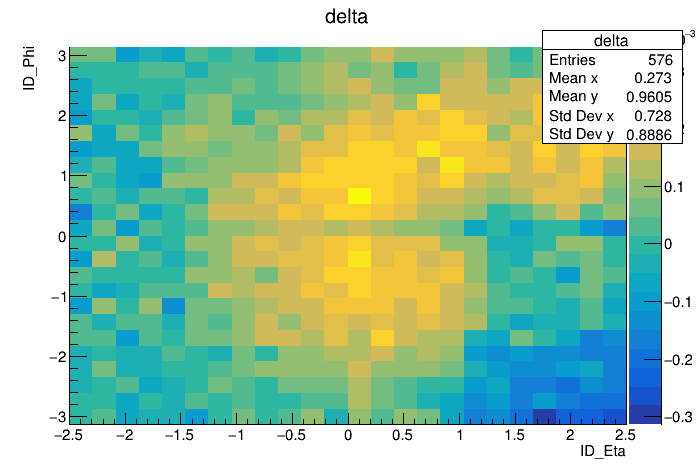

In [10]:
import numpy as np
deltas = np.linalg.solve(cov, equal_to)
print(deltas)
from SagittaBiasUtils import place_deltas_into_histogram
delta_hist, _ = place_deltas_into_histogram(deltas, global_binning_pos, location)
c= ROOT.TCanvas()
delta_hist.Draw()
delta_hist.Draw("COLZ")
c.Draw()


In [ ]:
#you can split an merge jobs. THis lets you scale the jobs to a dataset of any size. Have each CPU calcualte cov and equal_to for a fraction of the files, and then save them. Merge them together in the end
cov_1, equal_to_1, nentries_1 = get_cov_matrices(injected_df[:int(len(injected_df)/2)], location, global_binning_pos.get_global_nbins())
cov_2, equal_to_2, nentries_2 = get_cov_matrices(injected_df[int(len(injected_df)/2):], location, global_binning_pos.get_global_nbins())
cov = (cov_1*nentries_1 + cov_2*nentries_2)/(nentries_1 + nentries_2)
equal_to = (equal_to_1*nentries_1 + equal_to_2*nentries_2)/(nentries_1 + nentries_2)
deltas_merged = np.linalg.solve(cov, equal_to)
#b = Mx -- b is equal_to and M is cov, x are the deltas to solve for

Dotting


In [ ]:
deltas-deltas_merged # see, no difference!